## Getting Started
To prepare the LibRealSense Python environment, follow the steps below:

- Download [PyCharm](https://www.jetbrains.com/pycharm/download/#section=windows) integrated development environment
- Download [Python 3.7](https://www.python.org/downloads/release/python-3710/) or later 
- Download [get-pip.py](https://bootstrap.pypa.io/get-pip.py) and run the following commands in PyCharm terminal: 
    - ***python get-pip.py*** &emsp;&emsp;&emsp;&emsp;&nbsp;Pip tool to install Pip Python package
    - ***pip install pyrealsense2*** &emsp;&nbsp;Intel RealSense cross-platform open-source API
    - ***pip install numpy*** &emsp;&emsp;&emsp;&emsp;&nbsp;Fundamental package for scientific computing
    - ***pip install matplotlib*** &emsp;&emsp;&ensp;&nbsp;2D plotting library producing publication quality figures
    - ***pip install opencv-python***&nbsp;&nbsp;OpenCV packages for Python
    <br> 
        some of these packages are not directly used here, but maybe useful in other examples


### This Demo is for users who have RealSense Depth camera. It is tested on Linux and Windows 10.
- If you run on Linux, install [udev-rules](https://github.com/IntelRealSense/librealsense/blob/5ff27fca5aaeec4736d6bb3bfb958fee82ee198b/scripts/setup_udev_rules.sh)
- No further installation needed if you run on Windows.

### The demo will query sensors in the connected device, then it will display depth and color frames using Pipeline API.
- Check that the connected device is detected in Device Manager.
- The output from each code snippet can be seen under it. You can change the code and try different things and then press the play button to the left of each code snippet to run again. 

In [1]:
import os
import numpy as np                        # Fundamental package for scientific computing
import matplotlib.pyplot as plt           # 2D plotting library producing publication quality figures
from IPython.display import clear_output  # Clear the screen
import pyrealsense2 as rs                 # Intel RealSense cross-platform open-source API
print("Environment is Ready")

Environment is Ready


# Creating a Pipeline

The pipeline is a high-level API for streaming and processing frames, abstracting camera configurations and simplifying user interaction with the device and computer vision processing modules. Config is a utility object used by a pipeline.

In [2]:
pipe = rs.pipeline()                      # Create a pipeline
cfg = rs.config()                         # Create a default configuration
print("Pipeline is created")

Pipeline is created


## Find RealSense Devices

In [3]:
print("Searching Devices..")
selected_devices = []                     # Store connected device(s)

for d in rs.context().devices:
    selected_devices.append(d)
    print(d.get_info(rs.camera_info.name))
if not selected_devices:
    print("No RealSense device is connected!")

Searching Devices..
Intel RealSense D455


## Find Depth and RGB Sensors
Only RGB and Depth sensors are relevant for this demo.

In [4]:
rgb_sensor = depth_sensor = None

for device in selected_devices:                         
    print("Required sensors for device:", device.get_info(rs.camera_info.name))
    for s in device.sensors:                              # Show available sensors in each device
        if s.get_info(rs.camera_info.name) == 'RGB Camera':
            print(" - RGB sensor found")
            rgb_sensor = s                                # Set RGB sensor
        if s.get_info(rs.camera_info.name) == 'Stereo Module':
            depth_sensor = s                              # Set Depth sensor
            print(" - Depth sensor found")

Required sensors for device: Intel RealSense D455
 - Depth sensor found
 - RGB sensor found


## Displaying Depth and Color Frames

RuntimeError: Frame didn't arrive within 5000

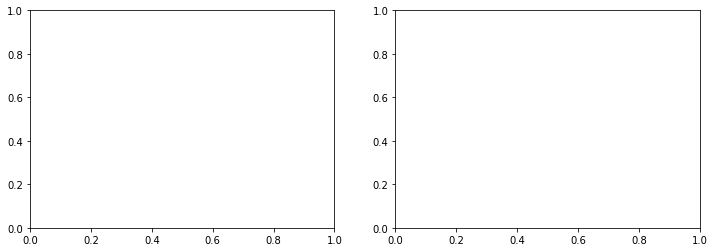

In [5]:
colorizer = rs.colorizer()                                # Mapping depth data into RGB color space
profile = pipe.start(cfg)                                 # Configure and start the pipeline

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4)) # Show 1 row with 2 columns for Depth and RGB frames
title = ["Depth Image", "RGB Image"]                      # Title for each frame

for _ in range(10):                                       # Skip first frames to give syncer and auto-exposure time to adjust
    frameset = pipe.wait_for_frames()
    
for _ in range(5):                                        # Increase to display more frames
    frameset = pipe.wait_for_frames()                     # Read frames from the file, packaged as a frameset
    depth_frame = frameset.get_depth_frame()              # Get depth frame
    color_frame = frameset.get_color_frame()              # Get RGB frame

    colorized_streams = []                                # This is what we'll actually display
    if depth_frame:
        colorized_streams.append(np.asanyarray(colorizer.colorize(depth_frame).get_data()))
    if color_frame:
        colorized_streams.append(np.asanyarray(color_frame.get_data()))
    
    for i, ax in enumerate(axs.flatten()):                # Iterate over all (Depth and RGB) colorized frames
        if i >= len(colorized_streams): continue          # When getting less frames than expected
        plt.sca(ax)                                       # Set the current Axes and Figure
        plt.imshow(colorized_streams[i])                  # colorized frame to display
        plt.title(title[i])                               # Add title for each subplot
    clear_output(wait=True)                               # Clear any previous frames from the display
    plt.tight_layout()                                    # Adjusts display size to fit frames
    plt.pause(1)                                          # Make the playback slower so it's noticeable
    
pipe.stop()                                               # Stop the pipeline
print("Done!")